# rf203_ranges
Addition and convolution: fitting and plotting in sub ranges




**Author:**  Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:17 AM.</small></i>

In [1]:
from __future__ import print_function
import ROOT

Set up model
---------------------

Construct observables x

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)

Construct gaussx(x,mx,1)

In [3]:
mx = ROOT.RooRealVar("mx", "mx", 0, -10, 10)
gx = ROOT.RooGaussian("gx", "gx", x, mx, 1.0)

px = 1 (flat in x)

In [4]:
px = ROOT.RooPolynomial("px", "px", x)

model = f*gx + (1-f)px

In [5]:
f = ROOT.RooRealVar("f", "f", 0.0, 1.0)
model = ROOT.RooAddPdf("model", "model", [gx, px], [f])

Generated 10000 events in (x,y) from pdf model

In [6]:
modelData = model.generate({x}, 10000)

Fit full range
---------------------------

Fit pdf to all data

In [7]:
r_full = model.fitTo(modelData, Save=True, PrintLevel=-1)

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Fit partial range
----------------------------------

Define "signal" range in x as [-3,3]

In [8]:
x.setRange("signal", -3, 3)

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'signal' created with bounds [-3,3]


Fit pdf only to data in "signal" range

In [9]:
r_sig = model.fitTo(modelData, Save=True, Range="signal", PrintLevel=-1)

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_model_modelData' created with bounds [-3,3]
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Plot/print results
---------------------------------------

Make plot frame in x and add data and fitted model

In [10]:
frame = x.frame(Title="Fitting a sub range")
modelData.plotOn(frame)
model.plotOn(frame, Range="Full", LineColor="r", LineStyle="--")  # Add shape in full ranged dashed
model.plotOn(frame)  # By default only fitted range is shown

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clear the automatic fit range attribute: <pdf>.removeStringAttribute("fitrange");
	- Explicitly specify the plotting range: Range("<rangeName>").
	- Explicitly specify where to compute the normalisation: NormRange("<rangeName>").
	The default (full) range can be denoted with Range("") / NormRange("").
[#0] ERROR:Plotting -- Range 'Full' not defined for variable 'x'. Ignoring ...
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'Full'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_modelData'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in a subrange and no explicit Range() and NormRange() was specified. Plotting / normalising in fit range. To override, do one of the following
	- Clea

Print fit results

In [11]:
print("result of fit on all data ")
r_full.Print()
print("result of fit in in signal region (note increased error on signal fraction)")
r_sig.Print()

result of fit on all data 
result of fit in in signal region (note increased error on signal fraction)

  RooFitResult: minimized FCN value: 25939.4, estimated distance to minimum: 3.77183e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     f    5.0441e-01 +/-  6.32e-03
                    mx   -2.1605e-02 +/-  1.77e-02


  RooFitResult: minimized FCN value: 10339.5, estimated distance to minimum: 0.000279216
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     f    4.8979e-01 +/-  1.62e-02
                    mx   -2.1518e-02 +/-  1.79e-02



Draw frame on canvas

In [12]:
c = ROOT.TCanvas("rf203_ranges", "rf203_ranges", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()

c.SaveAs("rf203_ranges.png")

Info in <TCanvas::Print>: png file rf203_ranges.png has been created


Draw all canvases 

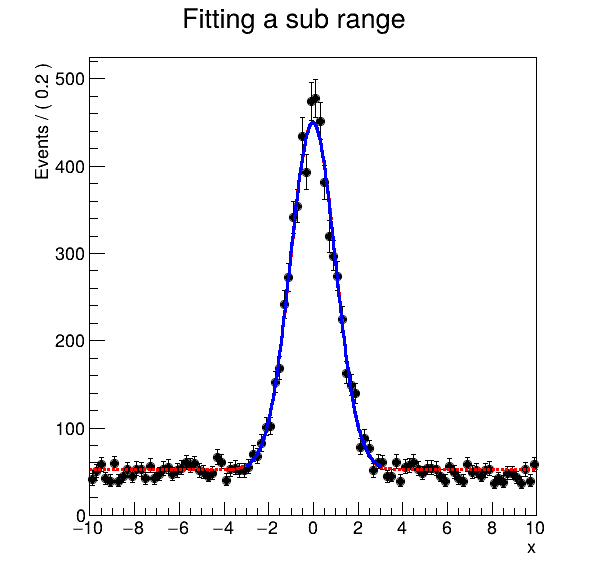

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()